# **Automated Attendance System**

## 1. Import Libraries

In [5]:
import os
import time
import pickle
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import Adam
from PIL import Image 
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.image as mpimg
from keras.callbacks import ReduceLROnPlateau

## 2. Images Loading and Preprocessing

### i. Loading Images

In [6]:
TrainingImagePath='/home/olitye/Code/AI/CNN/Images/Training-Images'
TestImagePath = '/home/olitye/Code/AI/CNN/Images/Testing-Images'

### ii.  Sample training images with respective labels and test images

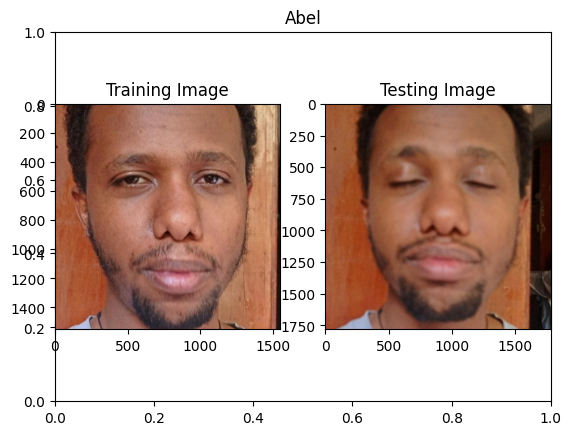

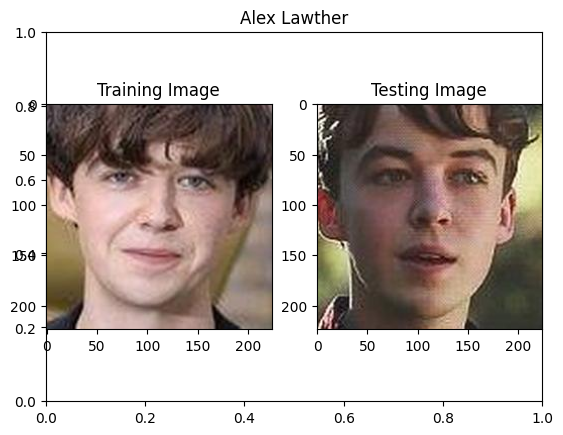

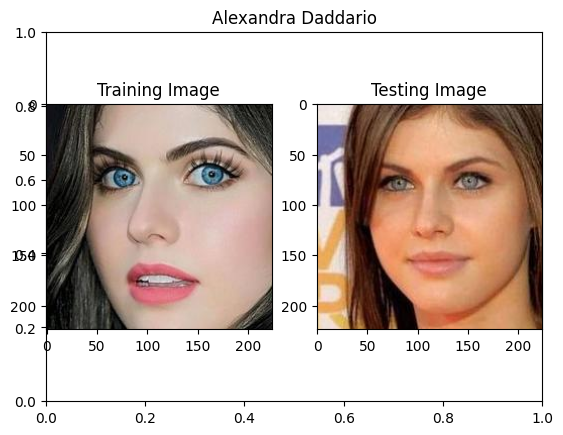

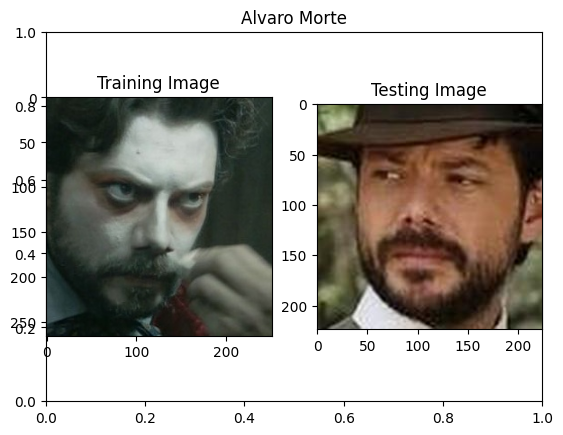

In [7]:
# Defining pre-processing transformations on raw images of training data
# These hyper parameters helps to generate slightly twisted versions
# of the original image, which leads to a better model, since it learns
# on the good and bad mix of images

# show the image first 4 persons in both training and testing data

image_length = 0

array = os.listdir(TrainingImagePath)
array.sort()

for path in array:


        plt.title(str(path).split('-')[0])
        image_folder_path = os.path.join(TrainingImagePath, path)
        image_folder_path_testing = os.path.join(TestImagePath, path)
        plt.subplot(1, 2, 1)
        image_path = os.path.join(image_folder_path, os.listdir(image_folder_path)[0])
        image_ = plt.imread(image_path)
        plt.title('Training Image')
        plt.imshow(image_)
        plt.subplot(1, 2, 2)
        image_path_testing = os.path.join(image_folder_path_testing, os.listdir(image_folder_path_testing)[0])
        image_testing = plt.imread(image_path_testing)
        plt.title('Testing Image')
        plt.imshow(image_testing)
        plt.show()
        image_length += 1

        if image_length == 4:break


### iii. Augmenting Images and Generating Images for Better Training

In [8]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
)

# Defining pre-processing transformations on raw images of testing data
# No transformations are done on the testing images
test_datagen = ImageDataGenerator(
        rescale=1./255
)

# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')


# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        TestImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 714 images belonging to 47 classes.


Found 175 images belonging to 47 classes.


## 3. Label and Save The Classes

In [9]:
# Printing class labels for each face
test_set.class_indices

{'Abel-Ugr2334-A-M': 0,
 'Alex Lawther-A-M-1247': 1,
 'Alexandra Daddario-A-M-1246': 2,
 'Alvaro Morte-A-M-1236': 3,
 'Bill Gates-A-M-1304': 4,
 'Danielle Panabaker-A-M-1330': 5,
 'Inbar Lavi-A-M-1235': 6,
 'Irina Shayk-A-M-1289': 7,
 'Jennifer Lawrence-A-M-1303': 8,
 'Johnny Depp-A-M-1333': 9,
 'NatnaelDereje-UGR858713-AI-M': 10,
 'NatnaelYemer-UGR456613-S-M': 11,
 'OlyadTemesgen-Ugr413313-AI-M': 12,
 'Petros-UGR333314-S-M': 13,
 'TadaelShewarega-UGR1234-Soft-M': 14,
 'barack obama-A-M-1272': 15,
 'face1-A-M-11': 16,
 'face10-A-M-6': 17,
 'face11-A-M-18': 18,
 'face12-A-M-14': 19,
 'face13-A-M-15': 20,
 'face14-A-M-16': 21,
 'face15-A-M-19': 22,
 'face16-A-M-8': 23,
 'face2-A-M-25': 24,
 'face3-A-M-4': 25,
 'face4-A-M-10': 26,
 'face5-A-M-10': 27,
 'face6-A-M-13': 28,
 'face7-A-M-17': 29,
 'face8-A-M-16': 30,
 'face9-A-M-9': 31,
 'subject01-F-F-2232': 32,
 'subject02-A-M-2229': 33,
 'subject03-D-M-2223': 34,
 'subject04-D-F-2235': 35,
 'subject05-A-F-2233': 36,
 'subject06-D-F-2228': 

subject10-H-F-2236 15
Bill Gates-A-M-1304 15
subject08-A-M-2225 15
face9-A-M-9 16
subject02-A-M-2229 15
Johnny Depp-A-M-1333 15
subject04-D-F-2235 15
NatnaelYemer-UGR456613-S-M 14
face15-A-M-19 15
subject07-G-F-2222 15
subject14-G-M-2230 15
Alexandra Daddario-A-M-1246 15
Danielle Panabaker-A-M-1330 15
face3-A-M-4 14
face10-A-M-6 16
Inbar Lavi-A-M-1235 15
face7-A-M-17 14
Alex Lawther-A-M-1247 15
TadaelShewarega-UGR1234-Soft-M 17
face8-A-M-16 14
subject13-A-M-2224 15
face6-A-M-13 16
subject06-D-F-2228 15
face14-A-M-16 14
Alvaro Morte-A-M-1236 15
barack obama-A-M-1272 15
face5-A-M-10 16
subject01-F-F-2232 15
face11-A-M-18 16
subject11-D-M-2231 15
face2-A-M-25 15
subject09-D-F-2226 16
subject05-A-F-2233 15
subject12-G-M-2234 15
face12-A-M-14 14
face16-A-M-8 16
face4-A-M-10 16
OlyadTemesgen-Ugr413313-AI-M 17
Jennifer Lawrence-A-M-1303 15
subject03-D-M-2223 15
face13-A-M-15 15
Petros-UGR333314-S-M 16
subject15-H-M-2227 15
NatnaelDereje-UGR858713-AI-M 16
Irina Shayk-A-M-1289 15
face1-A-M-11 1

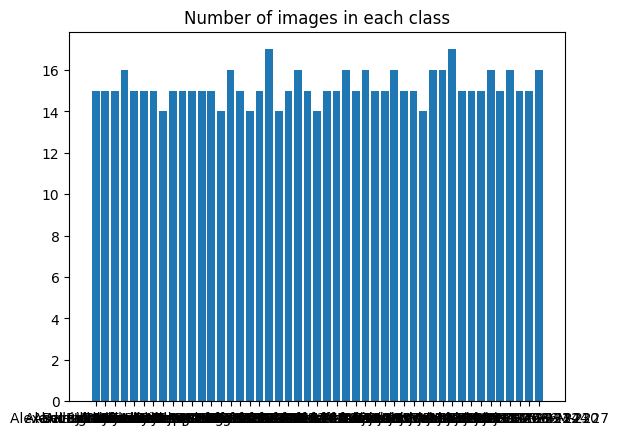

Maximum number of images in a class:  17
Minimum number of images in a class:  14
Average number of images in a class:  15.191489361702128


In [10]:
# Get the number of image in each class

numbers = []

for class_path in os.listdir(TrainingImagePath):
    numbers.append(len(os.listdir(os.path.join(TrainingImagePath, class_path))))
    print(class_path, len(os.listdir(os.path.join(TrainingImagePath, class_path))))

# Plotting the number of images in each class
plt.bar(test_set.class_indices.keys(), numbers)
plt.title('Number of images in each class')
plt.show()

# get the maximum number of images in a class
max_number = max(numbers)
print("Maximum number of images in a class: ", max_number)

# get the minimum number of images in a class
min_number = min(numbers)
print("Minimum number of images in a class: ", min_number)

# get the average number of images in a class
avg_number = sum(numbers)/len(numbers)
print("Average number of images in a class: ", avg_number)


In [11]:

TrainClasses=training_set.class_indices

ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName

with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)

print("Mapping of Face and its ID",ResultMap)

OutputNeurons=len(ResultMap)
print('\n The Number of output neurons(People): ', OutputNeurons)


Mapping of Face and its ID {0: 'Abel-Ugr2334-A-M', 1: 'Alex Lawther-A-M-1247', 2: 'Alexandra Daddario-A-M-1246', 3: 'Alvaro Morte-A-M-1236', 4: 'Bill Gates-A-M-1304', 5: 'Danielle Panabaker-A-M-1330', 6: 'Inbar Lavi-A-M-1235', 7: 'Irina Shayk-A-M-1289', 8: 'Jennifer Lawrence-A-M-1303', 9: 'Johnny Depp-A-M-1333', 10: 'NatnaelDereje-UGR858713-AI-M', 11: 'NatnaelYemer-UGR456613-S-M', 12: 'OlyadTemesgen-Ugr413313-AI-M', 13: 'Petros-UGR333314-S-M', 14: 'TadaelShewarega-UGR1234-Soft-M', 15: 'barack obama-A-M-1272', 16: 'face1-A-M-11', 17: 'face10-A-M-6', 18: 'face11-A-M-18', 19: 'face12-A-M-14', 20: 'face13-A-M-15', 21: 'face14-A-M-16', 22: 'face15-A-M-19', 23: 'face16-A-M-8', 24: 'face2-A-M-25', 25: 'face3-A-M-4', 26: 'face4-A-M-10', 27: 'face5-A-M-10', 28: 'face6-A-M-13', 29: 'face7-A-M-17', 30: 'face8-A-M-16', 31: 'face9-A-M-9', 32: 'subject01-F-F-2232', 33: 'subject02-A-M-2229', 34: 'subject03-D-M-2223', 35: 'subject04-D-F-2235', 36: 'subject05-A-F-2233', 37: 'subject06-D-F-2228', 38: 's

## 4. Training Model

### i. Initialize the CNN model

In [12]:
model = Sequential()

### ii. Add First Convolutional Layer

In [13]:
model.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

### iii. Add Second Convolutional Layer

In [14]:

model.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

### iv. Add Third Convolutional Layer

In [15]:
model.add(Convolution2D(128, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

### v. Add Fourth Convolutional Layer

In [16]:
model.add(Convolution2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
    

### v. Flattening Layer

In [17]:
model.add(Flatten())

### vi. Full Connection Layer

In [18]:
model.add(Dense(64, activation='relu'))
model.add(Dense(OutputNeurons, activation='softmax'))

### vii. Compile the Model

In [19]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy', 'recall', ])

### 5. Training the Model

In [20]:
StartTime=time.time()

# reduce learning rate when a metric has stopped improving.
# Factor 0.1 will reduce the learning rate by 0.1 if the validation loss has not improved for 3 epochs.

# learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=1, factor=0.4, min_lr=0.000001)
# from keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(
        training_set,
        epochs=60,
        batch_size=64,
        validation_data=test_set,
    )

EndTime=time.time()
print("###### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ######')

Epoch 1/60


23/23 [==============================] - 9s 290ms/step - loss: 0.2545 - accuracy: 0.0210 - val_loss: 0.1287 - val_accuracy: 0.0286
Epoch 2/60
23/23 [==============================] - 6s 262ms/step - loss: 0.1152 - accuracy: 0.0154 - val_loss: 0.1091 - val_accuracy: 0.0343
Epoch 3/60
23/23 [==============================] - 6s 263ms/step - loss: 0.1086 - accuracy: 0.0182 - val_loss: 0.1069 - val_accuracy: 0.0229
Epoch 4/60
23/23 [==============================] - 6s 238ms/step - loss: 0.1063 - accuracy: 0.0112 - val_loss: 0.1050 - val_accuracy: 0.0229
Epoch 5/60
23/23 [==============================] - 5s 235ms/step - loss: 0.1053 - accuracy: 0.0126 - val_loss: 0.1028 - val_accuracy: 0.0457
Epoch 6/60
23/23 [==============================] - 6s 241ms/step - loss: 0.1027 - accuracy: 0.0280 - val_loss: 0.0993 - val_accuracy: 0.0457
Epoch 7/60
23/23 [==============================] - 5s 236ms/step - loss: 0.0980 - accuracy: 0.0630 - val_loss: 0.0952 - val_accuracy: 0.0457
Epoch 8/60
23/23 

### vii. Save the Model

In [21]:
model.save("face_recognition_model.keras")

# 6. Model Results


## Training and Validation Accuracy

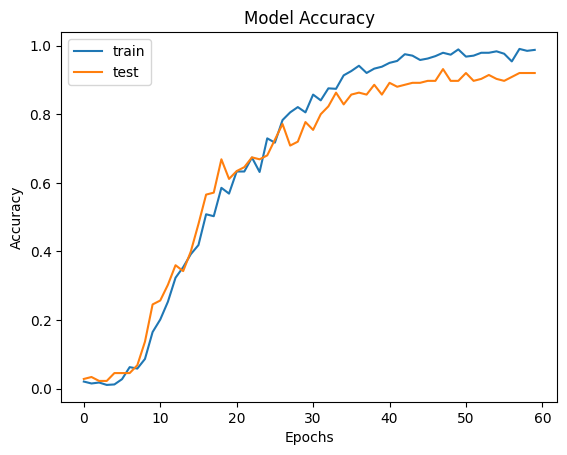

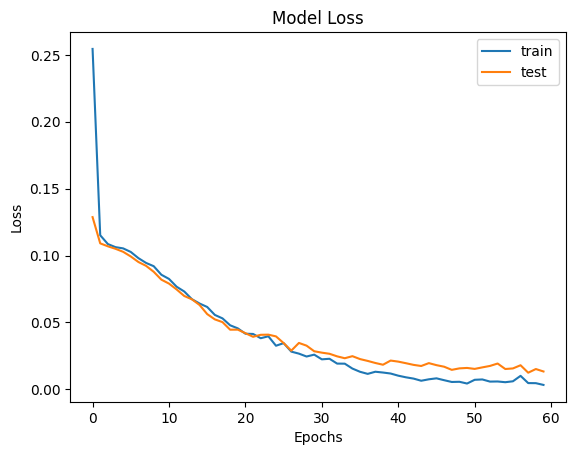

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

## Load the Model

In [23]:
model = load_model("face_recognition_model.keras")

with open("ResultsMap.pkl", 'rb') as fileReadStream:
    ResultMap = pickle.load(fileReadStream)

with open("ResultsMap.pkl", 'rb') as fileReadStream:
    ResultMap = pickle.load(fileReadStream)


## Testing the Model

1/1 [==============================] - 0s 28ms/step


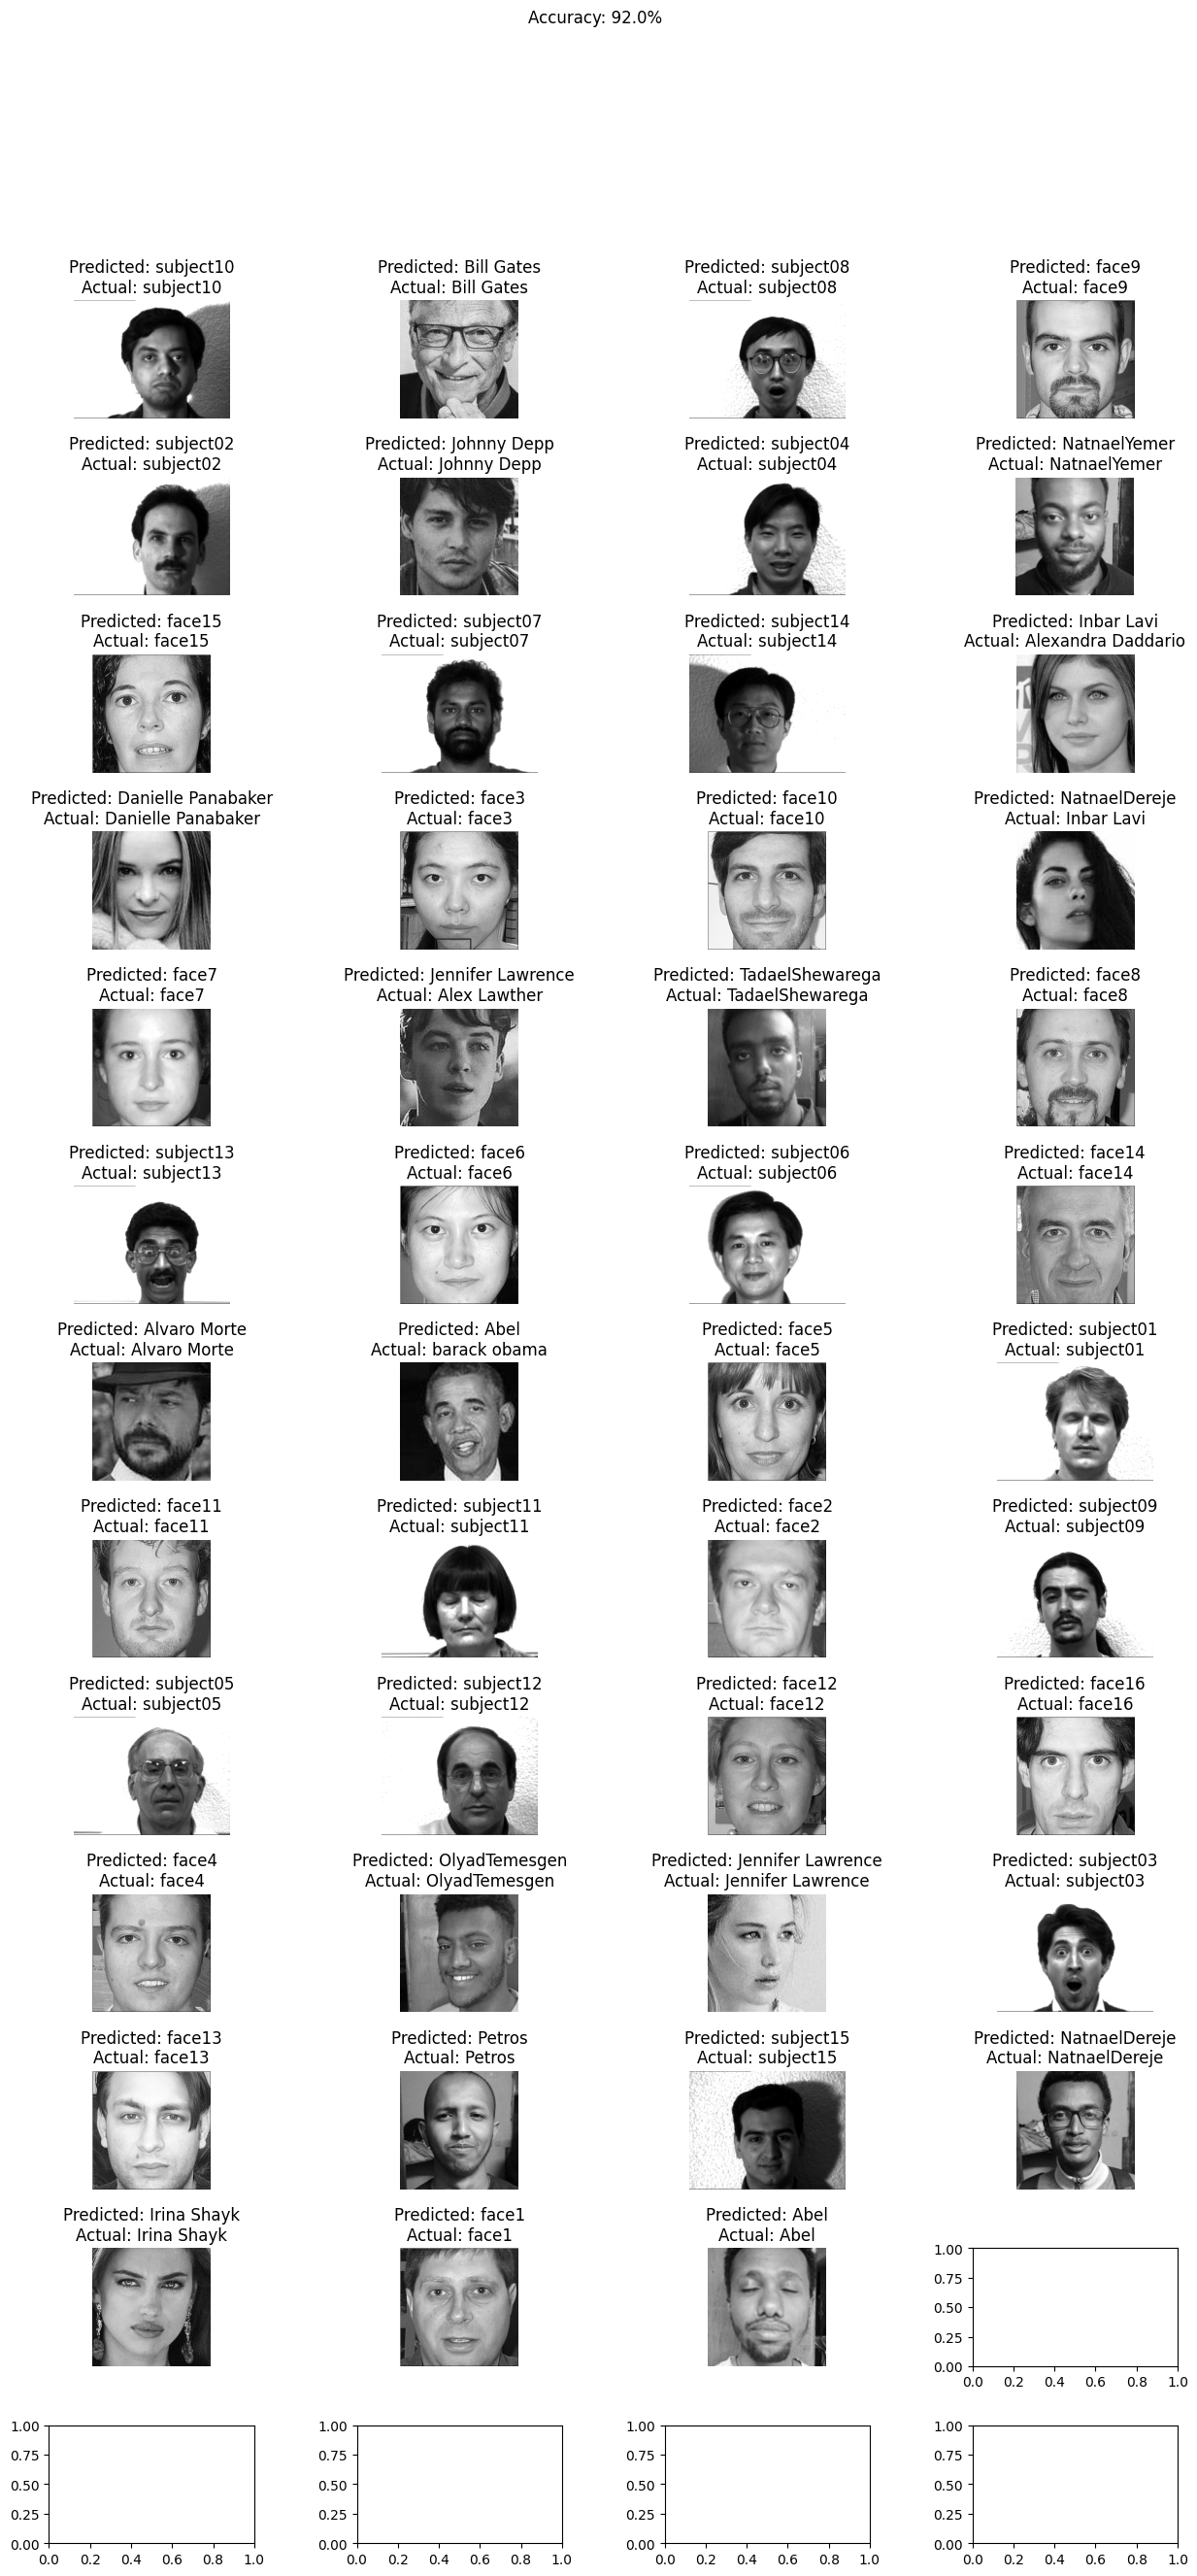

In [24]:
test_image_path = '/home/olitye/Code/AI/CNN/Images/Testing-Images'
number_of_test_images = 0       
truth_number = 0
number = 0
images_path = os.listdir(test_image_path)

persons_count = 0
already_seen = set()
peoples = 0

fig, axes = plt.subplots(nrows=13, ncols=4, figsize=(15, 30))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for person_folder in images_path:

    persons_count += 1
    for img in os.listdir(os.path.join(test_image_path, person_folder)):
        
        # Loading the image in grayscale format
        test_image = image.load_img(os.path.join(test_image_path, person_folder, img), target_size=(64, 64))
        
        # Converting the image to a numpy array
        test_image = image.img_to_array(test_image)

        # change the arr to 1 / 255
        test_image = test_image / 255.0
        
        
        # Expanding the shape of an array from 3 to 4 dimensions
        test_image = np.expand_dims(test_image, axis=0)
        
        # Making predictions on the test image
        prediction = model.predict(test_image)
        
        # Getting the index of the class with maximum probability
        predicted_class = np.argmax(prediction)
        
        # Mapping the predicted class to the respective person name
        predicted_person = ResultMap[predicted_class]

        # Calculate subplot index
        row = number // 4
        col = number % 4

        # Plot the image
        peoples += 1
        number_of_test_images += 1
        if predicted_person == person_folder:
            truth_number += 1

        if person_folder.split("-")[0] in already_seen:
            continue

        test_image = Image.open(os.path.join(test_image_path, person_folder, img))
        test_image = test_image.convert('L')
        ax = axes[row, col]
        ax.imshow(test_image, cmap='gray')
        ax.set_title(f'Predicted: {predicted_person.split("-")[0]}\nActual: {person_folder.split("-")[0]}')
        ax.axis('off')

        already_seen.add(person_folder.split("-")[0])
        

        number += 1

plt.suptitle(f"Accuracy: {round(truth_number / number_of_test_images * 100, 2)}%")
plt.show()


In [25]:
# predict one image and show the probability of each person and their sum
test_image_path = '/home/olitye/Code/AI/CNN/Images/Testing-Images/Alex Lawther-A-M-1247/Alex Lawther4_112.jpg'

model = load_model("face_recognition_model.keras")


test_image = image.load_img(test_image_path, target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = test_image / 255.0
test_image = np.expand_dims(test_image, axis=0)


prediction = model.predict(test_image)



print(prediction)


print(np.sum(prediction))

print(np.argmax(prediction))

print(ResultMap[np.argmax(prediction)])

1/1 [==============================] - 0s 91ms/step
[[4.9820700e-11 9.1236603e-01 6.2397819e-05 7.0140663e-06 4.5085383e-07
  1.1676006e-03 1.7552834e-08 7.8763030e-02 8.9953681e-07 7.5046425e-03
  1.0136007e-18 1.2598492e-04 1.1210894e-07 5.7189782e-12 4.0826663e-08
  1.7251105e-07 1.5045802e-17 3.2602049e-19 2.9822539e-14 9.8770034e-16
  4.6836507e-11 1.4528253e-17 5.0463158e-16 1.2678018e-15 1.3341844e-10
  6.8837712e-17 8.6940759e-16 1.9832214e-10 1.0748125e-15 5.2929079e-18
  3.2191458e-11 8.4529279e-11 3.9736065e-07 5.8763380e-08 3.9560894e-12
  8.9486052e-13 1.0158707e-11 6.3336649e-12 1.3839411e-14 2.3542081e-14
  1.0878131e-13 3.4756330e-14 1.1990616e-06 1.0797717e-17 7.7815551e-16
  7.1264969e-16 2.2346249e-09]]
1.0000001
1
Alex Lawther-A-M-1247


In [26]:
print("Accuracy: ", round((truth_number/number_of_test_images)*100, 2), '%')

Accuracy:  92.0 %
